# Covid X-Ray Diagnosis
## Machine Learning Final Project
### Enver Kapetanovic & Adrien Ventugol 
### Group 15

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import sklearn
import imblearn

In [17]:
loaded_images = pd.read_csv("data.csv")
loaded_images

,File name,Data,Tested
0,covid_0,[135 128 116 ... 220 227 255],1
1,covid_1,[105 103 102 ... 190 195 200],1
2,covid_2,[ 19 20 22 ... 150 148 145],1
3,covid_3,[ 6 6 6 ... 11 13 10],1
4,covid_4,[6 6 6 ... 6 6 4],1
5,covid_5,[ 0 0 0 ... 11 14 11],1
6,covid_6,[229 98 6 ... 154 174 221],1
7,covid_7,[130 119 126 ... 145 143 143],1
8,covid_8,[250 251 251 ... 18 17 17],1
9,covid_9,[35 65 47 ... 31 30 34],1


In [7]:
loaded_images = loaded_images.fillna(0)

#input the frequency of each pixel color into the dataframe
for j in range(loaded_images.shape[0]):
    counted = np.unique(loaded_images.loc[(0,'Data')],return_counts = True)
    pixel_shade = counted[0]
    index = 0
    frequency = counted[1]
    for i in pixel_shade:
        loaded_images.loc[(j,str(i))] = frequency[index]
        index+=1
loaded_images   


,File name,Data,0,1,2,3,4,5,6,7,...,257,258,259,260,261,262,263,264,265,Tested
0,covid_0,"[132, 104, 57, 20, 7, 2, 0, 2, 5, 6, 7, 6, 7, ...",1,0,2,0,0,1,4,7,...,0,0,0,0,0,0,0,0,0,1
1,covid_1,"[106, 104, 104, 108, 109, 112, 128, 148, 163, ...",1,0,2,0,0,1,4,7,...,0,0,0,0,0,0,0,0,0,1
2,covid_2,"[20, 21, 22, 23, 22, 23, 27, 82, 153, 141, 115...",1,0,2,0,0,1,4,7,...,0,0,0,0,0,0,0,0,0,1
3,covid_3,"[6, 6, 7, 7, 7, 8, 7, 7, 7, 6, 5, 5, 4, 3, 1, ...",1,0,2,0,0,1,4,7,...,0,0,0,0,0,0,0,0,0,1
4,covid_4,"[6, 7, 7, 8, 8, 8, 7, 7, 7, 7, 6, 6, 5, 5, 4, ...",1,0,2,0,0,1,4,7,...,0,0,0,0,0,0,0,0,0,1
5,covid_5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,0,2,0,0,1,4,7,...,0,0,0,0,0,0,0,0,0,1
6,covid_6,"[126, 23, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",1,0,2,0,0,1,4,7,...,0,0,0,0,0,0,0,0,0,1
7,covid_7,"[126, 129, 130, 132, 135, 136, 136, 136, 135, ...",1,0,2,0,0,1,4,7,...,0,0,0,0,0,0,0,0,0,1
8,covid_8,"[258, 231, 153, 160, 158, 157, 157, 156, 156, ...",1,0,2,0,0,1,4,7,...,0,0,0,0,0,0,0,0,0,1
9,covid_9,"[55, 66, 69, 74, 72, 93, 124, 126, 148, 147, 1...",1,0,2,0,0,1,4,7,...,0,0,0,0,0,0,0,0,0,1


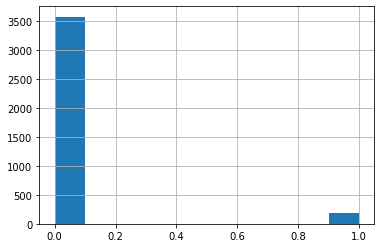

In [8]:
#Separate Data into X and y
y = loaded_images.loc[0:,'Tested']
X = loaded_images.loc[0:,'0':'255']
y.hist()

In [88]:
#Train test split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, train_size=.8, random_state=0)

3201    0
17      1
1242    0
793     0
2424    0
1680    0
2188    0
1855    0
1612    0
1567    0
710     0
3362    0
1246    0
2996    0
3180    0
2754    0
1845    0
493     0
2193    0
2133    0
3417    0
981     0
1952    0
289     0
683     0
1070    0
2862    0
3681    0
1957    0
3185    0
       ..
2825    0
2120    0
2893    0
537     0
1701    0
2897    0
3672    0
2222    0
2135    0
2599    0
3558    0
705     0
2362    0
3468    0
2648    0
3544    0
3142    0
2647    0
1828    0
1778    0
277     0
1033    0
3431    0
1731    0
763     0
835     0
3264    0
1653    0
2607    0
2732    0
Name: Tested, Length: 3011, dtype: int64
496     0
2994    0
1129    0
935     0
1059    0
491     0
882     0
2832    0
1174    0
3170    0
3618    0
2984    0
1313    0
587     0
3311    0
1151    0
1412    0
1710    0
3309    0
953     0
2563    0
2843    0
940     0
481     0
1669    0
2844    0
2727    0
452     0
1511    0
543     0
       ..
719     0
3284    0
138     1
50      1

In [89]:
#Imbalanced Data, Solve with Random Over Sampling Technique
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
ros = RandomOverSampler(random_state=3)
rus = RandomUnderSampler(random_state=3)
X_train, y_train = ros.fit_resample(X_train, y_train)
print(sum(y_train[:,0])

0       0
1       1
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
5692    1
5693    1
5694    1
5695    1
5696    1
5697    1
5698    1
5699    1
5700    1
5701    1
5702    1
5703    1
5704    1
5705    1
5706    1
5707    1
5708    1
5709    1
5710    1
5711    1
5712    1
5713    1
5714    1
5715    1
5716    1
5717    1
5718    1
5719    1
5720    1
5721    1
Name: Tested, Length: 5722, dtype: int64


In [83]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [84]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [85]:
recall_score(y_test, clf.predict(X_test), average = None)

array([1., 0.])

In [86]:
accuracy_score(y, clf.predict(X))

0.9511158342189161